In [1]:
import cv2  # OpenCV library for image processing
import numpy as np
import matplotlib.pyplot as plt

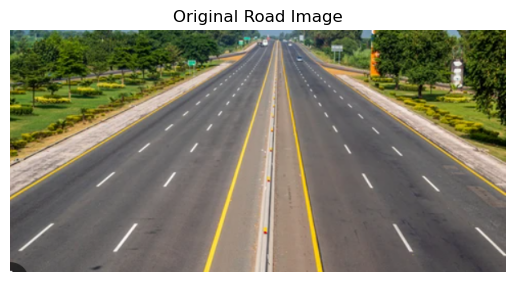

In [2]:
# Load an image (e.g., sample road image)
image = cv2.imread('C:/Users/tejas/OneDrive/Pictures/Screenshots/lane.png')
# Convert to RGB for plotting with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Original Road Image")
plt.axis("off")
plt.show()

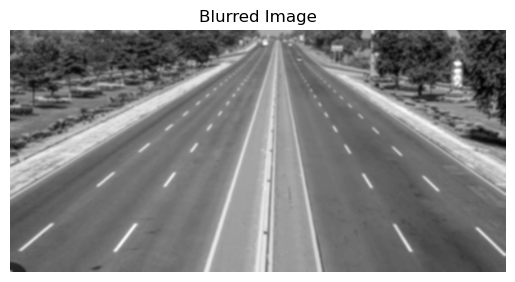

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise and improve edge detection
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Display the blurred image
plt.imshow(blur, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.show()


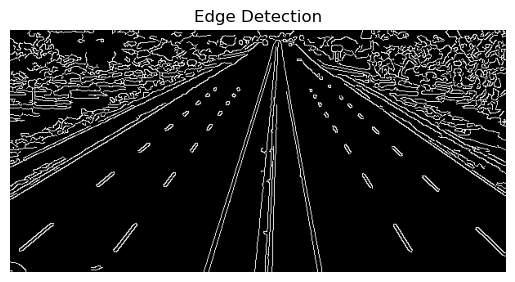

In [4]:
# Apply Canny Edge Detection
edges = cv2.Canny(blur, 50, 150)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")
plt.show()


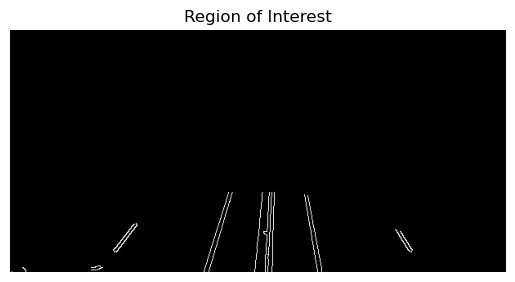

In [5]:
# Create a mask for the region of interest
mask = np.zeros_like(edges)
height, width = edges.shape

# Define a triangular polygon for the mask (adjust points based on your image size)
polygon = np.array([[
    (0, height),
    (width, height),
    (width//2 + 50, height//2 + 50),
    (width//2 - 50, height//2 + 50),
]], np.int32)

# Fill the polygon with white color
cv2.fillPoly(mask, polygon, 255)

# Mask the edges image
masked_edges = cv2.bitwise_and(edges, mask)

# Display the masked edges
plt.imshow(masked_edges, cmap='gray')
plt.title("Region of Interest")
plt.axis("off")
plt.show()


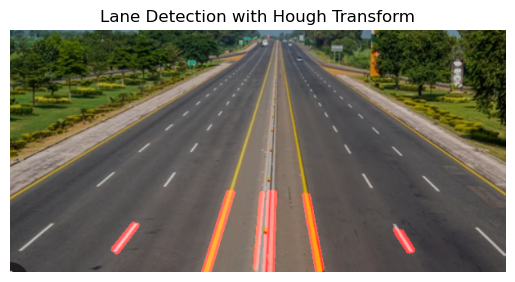

In [6]:
# Define parameters for Hough Line Transform
rho = 1               # Reduced distance resolution
theta = np.pi / 180   # Smaller angular resolution
threshold = 20        # Lower threshold for line detection
min_line_length = 20  # Shorter minimum line length
max_line_gap = 15     # Reduced gap for connected lines

# Run Hough Line Transform
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        minLineLength=min_line_length, maxLineGap=max_line_gap)

# Create a blank image to draw lines
line_image = np.zeros_like(image)

# Draw lines on the blank image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Combine original image with the line image
combo_image = cv2.addWeighted(image_rgb, 0.8, line_image, 1, 1)

# Display the result
plt.imshow(combo_image)
plt.title("Lane Detection with Hough Transform")
plt.axis("off")
plt.show()
